In [3]:
import pandas as pd
import tensorflow as tf

In [4]:
# !pip3 install tensorflow

In [53]:
import deeplake
ds = deeplake.load('hub://activeloop/fer2013-train')

/

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train



\

hub://activeloop/fer2013-train loaded successfully.



In [52]:
import deeplake
ds_test = deeplake.load('hub://activeloop/fer2013-public-test')

\

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-public-test



/

hub://activeloop/fer2013-public-test loaded successfully.



In [54]:
images = ds.images

In [55]:
type(images)

deeplake.core.tensor.Tensor

In [56]:
images.shape

(28709, 48, 48)

In [57]:
labels = ds.labels
labels.shape

(28709, 1)

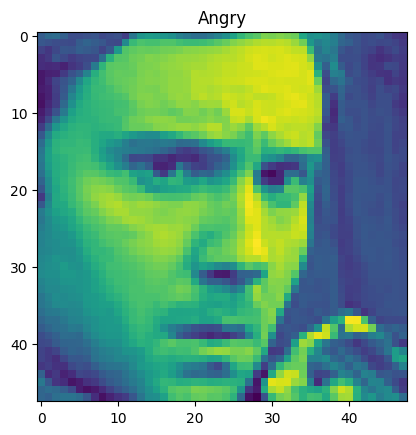

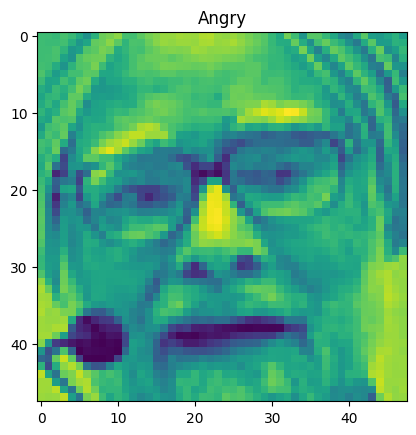

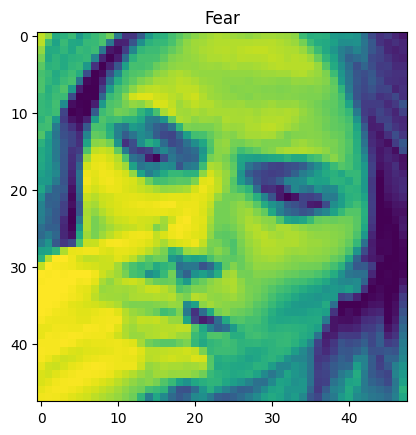

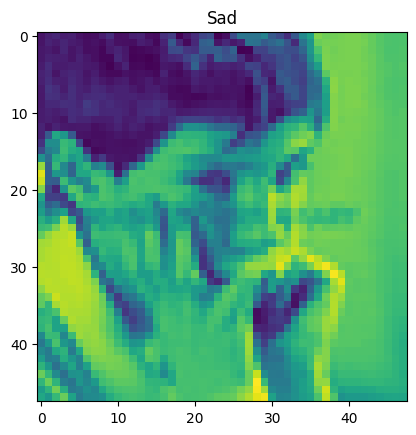

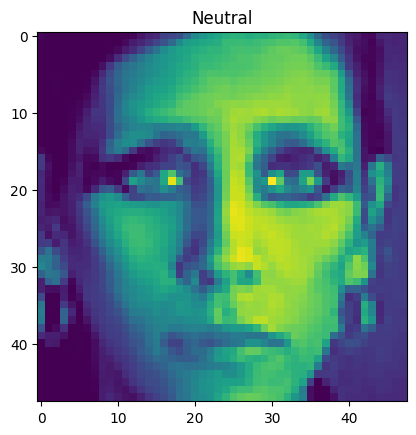

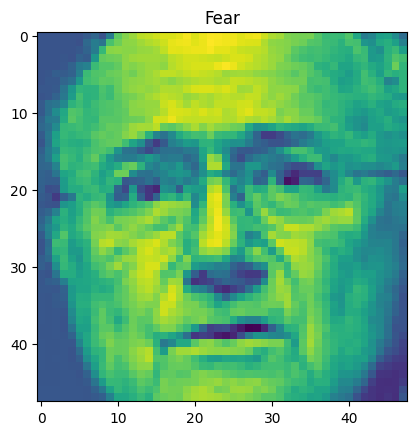

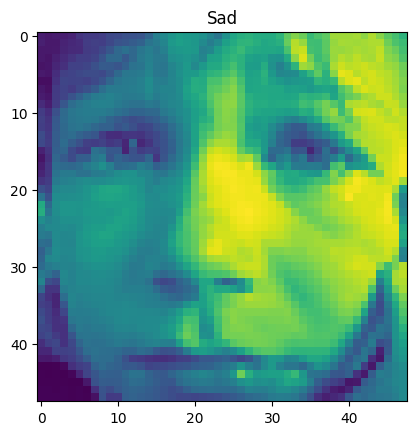

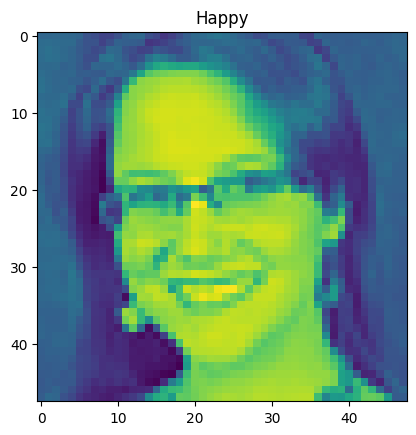

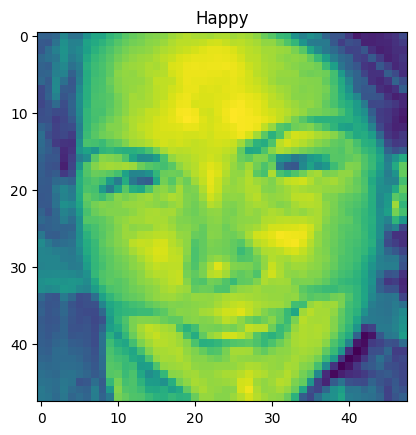

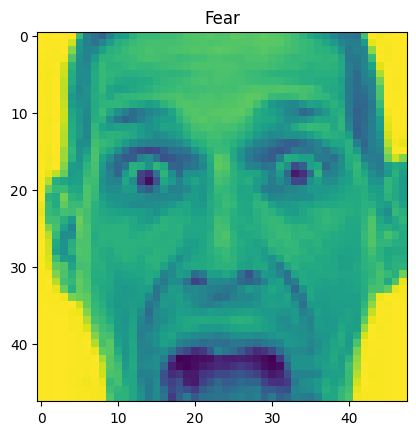

<Figure size 640x480 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping labels to label names
label_map = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}
 
samples = 10 
for i in range(samples):
     
    image = images[i]
    label_tensor = labels[i]

    label_value = label_tensor.numpy().item()

    plt.imshow(image)

    plt.title(label_map[label_value])
 
    plt.show()
 
    plt.clf()


In [59]:
import numpy as np

def check_normalization(images):
    images_np = images.numpy()
    
     
    min_pixel_value = images_np.min()
    max_pixel_value = images_np.max()
     
    mean_pixel_value = images_np.mean()
    std_pixel_value = images_np.std()

    print(f"Minimum pixel value: {min_pixel_value}")
    print(f"Maximum pixel value: {max_pixel_value}")
    print(f"Mean pixel value: {mean_pixel_value}")
    print(f"Standard deviation of pixel values: {std_pixel_value}")

    if 0 <= min_pixel_value <= max_pixel_value <= 1:
        print("Images appear to be normalized to the range [0, 1].")
    elif -1 <= min_pixel_value <= max_pixel_value <= 1:
        print("Images appear to be normalized to the range [-1, 1].")
    else:
        print("Images do not appear to be normalized to standard ranges.")
 
check_normalization(images)


Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 129.47433955331468
Standard deviation of pixel values: 65.02727348443116
Images do not appear to be normalized to standard ranges.


In [60]:
images_list = []
labels_list = []

# Iterate through the dataset and convert images and labels to Numpy arrays
for i in range(len(ds.images)):
    # Access image and label tensors from the dataset
    image_tensor = ds.images[i]
    label_tensor = ds.labels[i]
    
    # Convert image and label tensors to Numpy arrays
    image_np = image_tensor.numpy()
    label_np = label_tensor.numpy()

    # Append Numpy arrays to lists
    images_list.append(image_np)
    labels_list.append(label_np)

# Convert lists to Numpy arrays
images_np_array = np.array(images_list)
labels_np_array = np.array(labels_list)

print("Images and labels have been converted to Numpy arrays.")
print(f"Images shape: {images_np_array.shape}")
print(f"Labels shape: {labels_np_array.shape}")

c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeplake\core\tensor.py:714: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


Images and labels have been converted to Numpy arrays.
Images shape: (28709, 48, 48)
Labels shape: (28709, 1)


In [61]:
images_normalized = images_np_array.astype(np.float32) / 255.0

print("Images have been normalized.")
print(f"Shape of normalized images: {images_normalized.shape}")

Images have been normalized.
Shape of normalized images: (28709, 48, 48)


In [62]:
import numpy as np

# Assuming 'ds_test' is a Deep Lake dataset for testing
# Initialize a list to store normalized images
normalized_images_test = []

# Iterate through all samples in 'ds_test'
for i in range(len(ds_test.images)):
    # Access the image tensor from 'ds_test'
    image_tensor = ds_test.images[i]

    # Convert the image tensor to a Numpy array
    image_array = image_tensor.numpy()

    # Normalize the image
    image_normalized = image_array.astype(np.float32) / 255.0

    # Append the normalized image to the list
    normalized_images_test.append(image_normalized)

# Convert the list of normalized images to a Numpy array
normalized_images_test = np.array(normalized_images_test)

print("Images in 'ds_test' have been normalized.")
print(f"Shape of normalized images in 'ds_test': {normalized_images_test.shape}")


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeplake\core\tensor.py:714: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


Images in 'ds_test' have been normalized.
Shape of normalized images in 'ds_test': (3589, 48, 48)


In [65]:
from sklearn.model_selection import train_test_split
 
labels = np.array(labels) if not isinstance(labels, np.ndarray) else labels
 
assert images_normalized.shape[0] == labels.shape[0], "Mismatch in number of samples between images and labels"
 
try:
    train_images, test_images, train_labels, test_labels = train_test_split(
        images_normalized, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # Further split the training set into training and validation sets
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
    )

except Exception as e:
    print(f"An error occurred: {e}")
    print("Trying without stratify...")

    # Remove stratify and test splitting
    train_images, test_images, train_labels, test_labels = train_test_split(
        images_normalized, labels, test_size=0.2, random_state=42
    )

    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=42
    )

# Print the shapes of the splits
print(f"Training set: {train_images.shape}, {train_labels.shape}")
print(f"Validation set: {val_images.shape}, {val_labels.shape}")
print(f"Testing set: {test_images.shape}, {test_labels.shape}")


Training set: (18373, 48, 48), (18373, 1)
Validation set: (4594, 48, 48), (4594, 1)
Testing set: (5742, 48, 48), (5742, 1)


In [66]:

batch_size = 32
 
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(batch_size)


In [67]:

from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  
])


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [68]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [69]:

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    verbose=1
)


Epoch 1/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.2642 - loss: 1.7828 - val_accuracy: 0.3955 - val_loss: 1.5728
Epoch 2/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.4101 - loss: 1.5209 - val_accuracy: 0.4525 - val_loss: 1.4218
Epoch 3/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.4743 - loss: 1.3741 - val_accuracy: 0.4728 - val_loss: 1.3587
Epoch 4/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.5058 - loss: 1.2972 - val_accuracy: 0.4967 - val_loss: 1.3153
Epoch 5/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.5309 - loss: 1.2333 - val_accuracy: 0.5115 - val_loss: 1.3027
Epoch 6/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.5560 - loss: 1.1671 - val_accuracy: 0.5202 - val_loss: 1.2792
Epoch 7/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.5785 - loss: 1.1057 - val_accuracy: 0.5192 - val_loss: 1.2712
Epoch 8/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 44s 76ms/step - accuracy: 0.6014 - loss: 1.0589 - 

In [86]:
# model.save('model.h5')
model.save('my_model.keras')

In [71]:
 
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5048 - loss: 2.1678
Test loss: 2.1604
Test accuracy: 0.5188


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


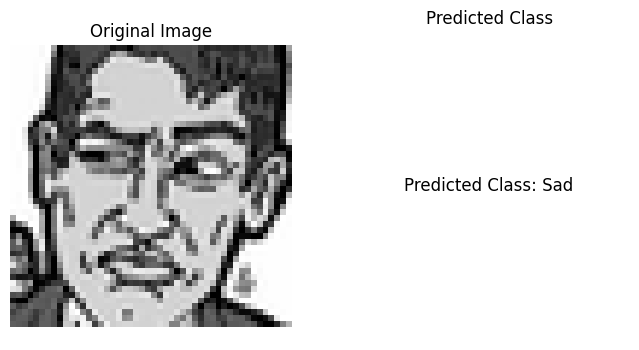

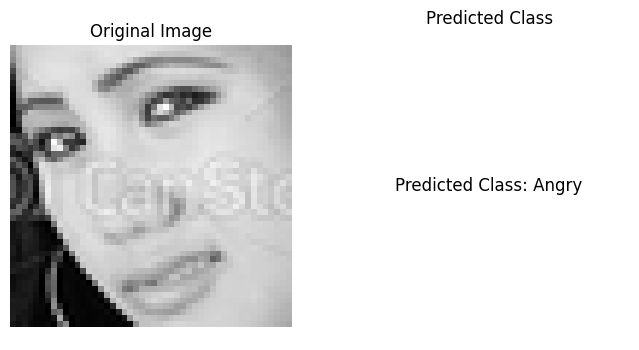

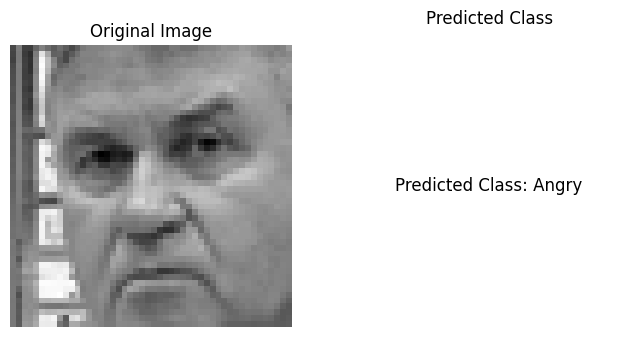

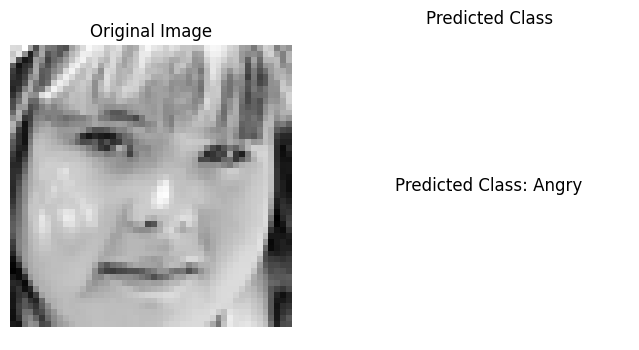

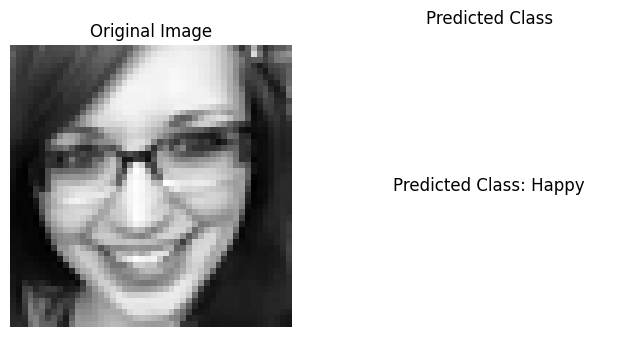

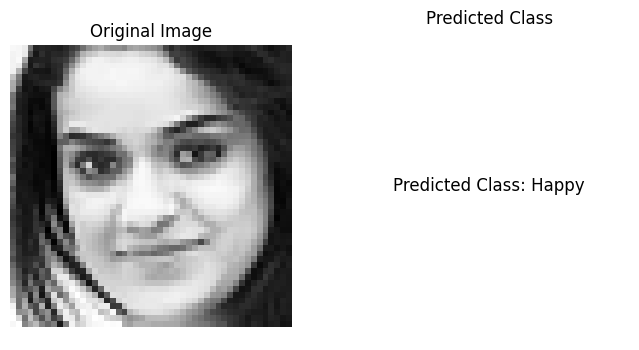

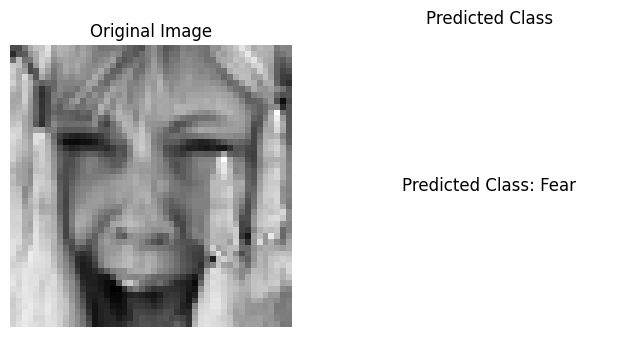

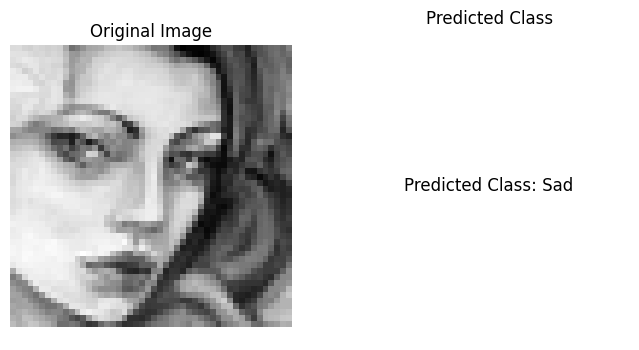

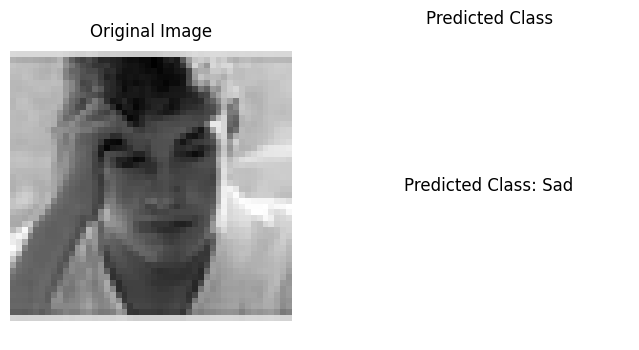

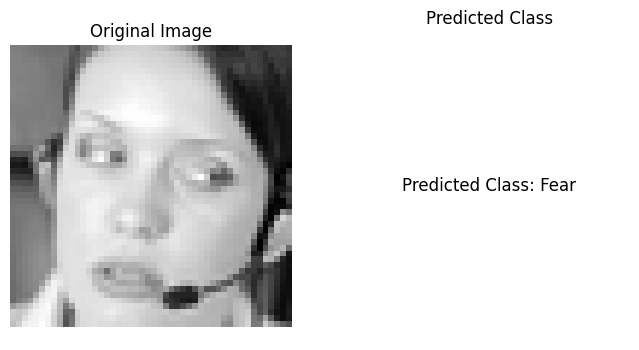

In [79]:
test_dataset = tf.data.Dataset.from_tensor_slices(normalized_images_test)
test_dataset = test_dataset.batch(batch_size)
original_images_test = [ds_test.images[i].numpy() for i in range(len(ds_test.images))]
# Perform inference on the normalized unseen test set
predictions = model.predict(normalized_images_test)

# Convert predictions to classes (find the class with the highest predicted probability for each image)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Define the number of samples to display
num_samples = 10  # Number of samples to display

# Iterate through a specified number of samples
for i in range(num_samples):
    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_images_test[i], cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Display the predicted class as text
    # The class is determined from `predicted_classes`
    predicted_class = predicted_classes[i]
    
    # You can convert the predicted class to a class label if you have a mapping (optional)
    # Example: Assuming you have a mapping from class indices to labels
    class_labels = ["Class1", "Class2", "Class3", "Class4", "Class5", "Class6", "Class7"]
    predicted_label = label_map[predicted_class]  # Get the label from the predicted class

    # Display the predicted label
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f"Predicted Class: {predicted_label}", fontsize=12, ha='center', va='center')
    plt.title("Predicted Class")
    plt.axis('off')
    
    # Show the plots
    plt.show()

144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4954 - loss: 2.3532
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Validation accuracy: 0.4983
Validation F1 score: 0.4972


In [87]:

# Define the path to your saved model file (my_model.keras)
model_path = 'my_model.keras'

# Load the model from the .keras file
model = tf.keras.models.load_model(model_path)

print("Model loaded successfully.")


Model loaded successfully.


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
